<a href="https://colab.research.google.com/github/jmcarbo/bioestadistica2020/blob/master/Practica3/Pr%C3%A1ctica%203.%20Estad%C3%ADstica%20descriptiva%20con%20SPSS%20y%20R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3: Estadística descriptiva con R

## Datos de partida

Se han recogido en una tabla datos relativos a unos **6000 partos** atendidos en el **Hospital del Mar** de Barcelona entre los años 1991 y 1999.

La tabla ha sido anonimizada para poder trabajar sobre ella sin infringir ninguna norma ética ni vulnerar los derechos de privacidad de los pacientes.

La tabla recoge las siguientes variables:

* ANYPART: Año de parto, la tabla recoge datos entre 1991 y 1999
* MESPART: Mes del parto
* DIAPART: Día del parto
* TRIMESTR: Trimestre del año en el cual se produjo el parto
* GESTACIO: Tipo de gestación (prematura o “a término”)
* PESNADO: Peso del neonato 
* EDATMARE: Edad de la madre en el momento del parto

## Objetivos de la práctica.

Obtención de estadísticos descriptivos a partir de la tabla completa de datos. En concreto, estamos interesados en conocer cuál es el peso de los niños y las edades de las madres.

## Protocolo

Descarga el fichero partos1.xls, que puedes encontrar en la carpeta practicas del Tema 3. Abre eldocumento con Excel para inspeccionar los datos. Anota el número objetos y de variables, así como el nombre y tipo de las variables. Cierra Excel antes de continuar.

Vamos a importar la tabla en el programa SPSS. Usa la opción Archivo>>>Abrir y selecciona en el recuadro “Archivos de Tipo”, la opción “Excel”. En el cuadro de diálogo, asegúrate de marcar la opción “Leer los nombres de las variables”.

Para analizar los pesos de los niños selecciona Analizar>>Estadísticos descriptivos>>Frecuencias. En el cuadro de diálogo selecciona la variables “PESNADO” y haz clic en la flecha para añadirla a la lista de variables a analizar. Deselecciona la opción de “Mostrar Tabla”. Pulsa el botón “Estadísticos” para seleccionar obtener estadísticos de tendencia central yde dispersión. Pulsa el botón “Gráficos” para seleccionar el mostrar un histograma. Pulsa “Aceptar”. Anota los resultados.

Si te fijas en el histograma algunos individuos tienen peso 0. Elimina estos casos usando el comando Datos>>>Seleccionar Casos... y repite el análisis descriptivo. Anota los resultados.

Analiza ahora la edad de las madres obteniendo los mismos estadísticos de tendencia central y dispersión. Anota los resultados.

Repetiremos ahora el análisis utilizando el programa R. Comienza por abrir el fichero con Excel y exportarlo en formato CSV a una carpeta que tenga una dirección sencilla (por ejemplo "C:\temp"). Sigue el procedimiento que se describe en la “Breve introducción a R” para importarlo y obtener un objetollamado “partos”de tipo data.frame. El comando final tendrá un formato similar a: 

```
partos <-read.csv("partos1.csv",sep=";",header=TRUE)
```


In [3]:
library(curl)
curl_download("https://raw.githubusercontent.com/jmcarbo/bioestadistica2020/master/Practica3/partos1.csv","partos1.csv")

In [4]:
partos<-read.csv("partos1.csv",sep=";",header=TRUE,stringsAsFactors = TRUE)

Para obtener los principales estadísticos descriptivos usa la función summary() con el objeto partos como único argumento. La función summary() también calcula estadísticos descriptivos sobre vectores de valores. 

In [5]:
summary(partos)

    ANYPART        MESPART          DIAPART         TRIMESTR    
 Min.   :1991   Min.   : 1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:1993   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.:2.000  
 Median :1996   Median : 7.000   Median :16.00   Median :3.000  
 Mean   :1995   Mean   : 6.658   Mean   :15.68   Mean   :2.548  
 3rd Qu.:1998   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:4.000  
 Max.   :1999   Max.   :12.000   Max.   :31.00   Max.   :4.000  
               GESTACIO       PESNADO        EDATMARE    
                   :1911   Min.   :   0   Min.   :12.00  
 A terme           :3578   1st Qu.:2870   1st Qu.:24.00  
 Gestacio prolongad: 233   Median :3190   Median :28.00  
 Gestacion prolonga:  11   Mean   :3170   Mean   :27.87  
 Prematur          : 309   3rd Qu.:3505   3rd Qu.:32.00  
                           Max.   :6530   Max.   :53.00  

Calcula estadísticos descriptivos mediante summary() para las columnas PESNADO y GESTACIO por separado. Consulta el final de la sección sobre manipulación de objetos de la “Breve introducción a R”.

Respecto a los estadísticos descriptivos obtenidos de la variable PESNADO, ¿podrías indicar por debajo de quéumbral de peso han nacido la mitad (el 50%) de los bebés?

Respecto a los estadísticos descriptivos obtenidos de la variable GESTACIO, habrás observado que al tratarse de una variable categórica (factor), estos estadísticos se reducen a una tabla del número de ocurrencias de cada valor distinto (nivel) observado en la variable. Si examinas detenidamente cuales son los niveles que toma la variable GESTACIO apreciarás que dos de ellos denotan el mismo caso, Gestacio prolongad y Gestacion prolonga, y que existen 1911 observaciones cuyo nivel no aparece especificado. Esta situación no es excepcional dado que a menudo los datos contienen errores o inconsistencias que debemos corregir antes de proceder a su análisis. Para llevar a cabo esta tarea primero examinaremos más detenidamente los niveles de la variable GESTACIO con la función levels()de esta forma:

```
levels(partos$GESTACIO)
```

In [6]:
levels(partos$GESTACIO)

[1] ""                   "A terme"            "Gestacio prolongad"
[4] "Gestacion prolonga" "Prematur"

Ahora podemos apreciar más claramente que el primer nivel corresponde a una cadena de caracteres vacía, denotada en R por dos pares de comillas dobles seguidas (""). En casos como este es razonable asumir que este tipo de valor denota el desconocimiento del tipo de gestación para esos 1911 bebés. Estos valores son denominados comúnmente valores perdidos (“missingvalues”, en inglés). La representación de valores perdidos en los ficheros originales puede variar dependiendo de cómo se generaron los datos, en este caso quedaron especificados por una cadena de caracteres vacía. En R, la convención utilizada para representar valoresperdidoses mediante la palabra NA del inglés Not Available. Es conveniente que nuestros valores perdidos sigan esta convención cuando los analizamos en R. Para llevar a cabo este cambio así como la consolidación de los dos niveles distintos, anteriormente mencionados, en uno solo, utilizaremos otra vez la función levels pero en esta ocasión para actualizar los niveles de la variable GESTACIO, de la siguiente forma:

```
levels(partos$GESTACIO)<-c(NA, "A terme", "Gestacio prolongada", "Gestacio prolongada", "Prematur")
```

In [7]:
levels(partos$GESTACIO)<-c(NA, "A terme", "Gestacio prolongada", "Gestacio prolongada", "Prematur")

Llama de nuevo a la función summary()sobre la variable GESTACIO y observa el cambio en la tabulación de los valores distintos.

In [8]:
summary(partos$GESTACIO)

A terme Gestacio prolongada            Prematur                NA's 
               3578                 244                 309                1911

En R puedes eliminar los casos problemáticos convirtiendo todos los valores de pesos de niños por debajo de un cierto umbral en valores perdidos. Por ejemplo, para eliminar los casos de niños con pesopor debajo de 300 gramos:

copia la variable a un vector

```
noupes <-partos$PESNADO
```

asigna a todos los valores menores de 300 con el código NA (missing value)

```
mascara <-noupes < 300
noupes[mascara]<-NA
```


In [10]:
noupes <-partos$PESNADO
mascara <-noupes < 300

Ahora puedes usar el vector “noupes”para obtener un histograma y un gráfico de caja usando los comandos “hist”y “boxplot”. Si quieres puedes ver la página de ayuda de estos comandos para usar otras opciones de visualización que no sean las opciones por defecto.

puedes usarhelp(hist) o help (boxplot) para ver otras opciones

```
hist(noupes)
hist(noupes,50)
```

```
boxplot(noupes)
boxplot(noupes,col="red")
```

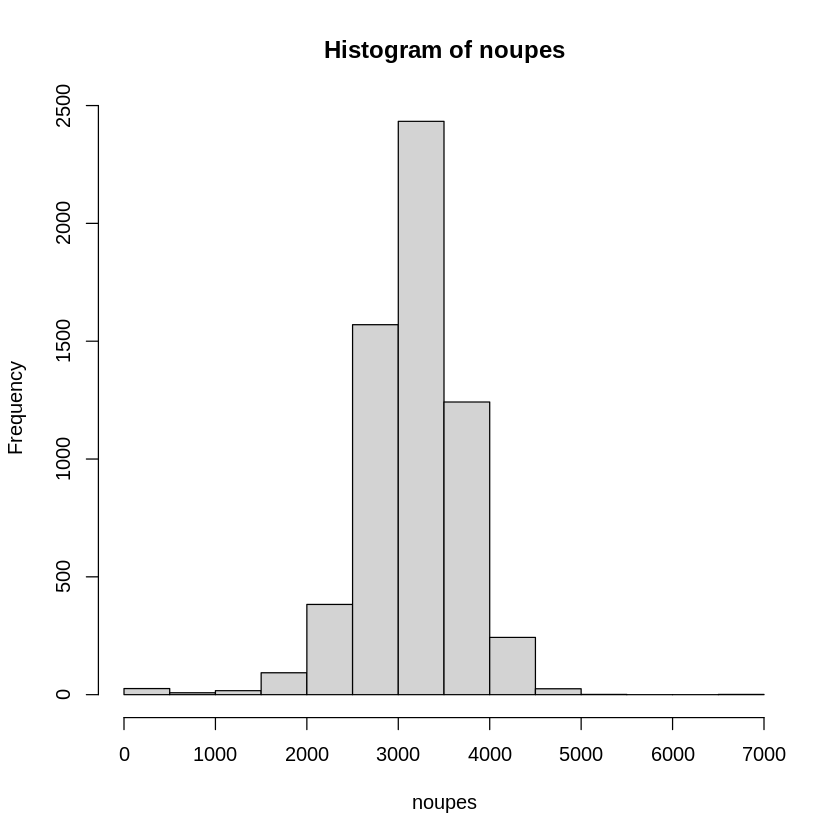

In [11]:
hist(noupes)

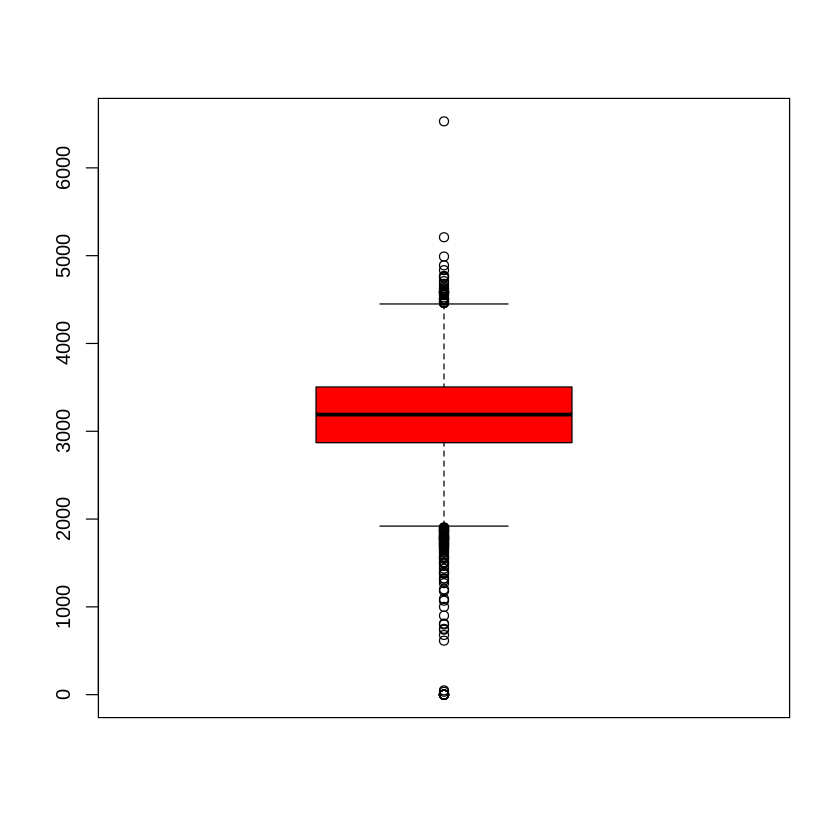

In [ ]:
boxplot(noupes,col="red")

Repite las mismas operaciones para la edad de las madres.

Por último, repetiremos el diagrama de cajas acostadas para la edad de las madres,agrupadas por trimestre de parto que obtuvimos en SPSS. Para ello obténun nuevo vector con las edades de las madres agrupadas por trimestre, usando el comando:

```
nouedat <-split(partos$EDATMARE,partos$TRIMESTR)
boxplot(nouedat)
```

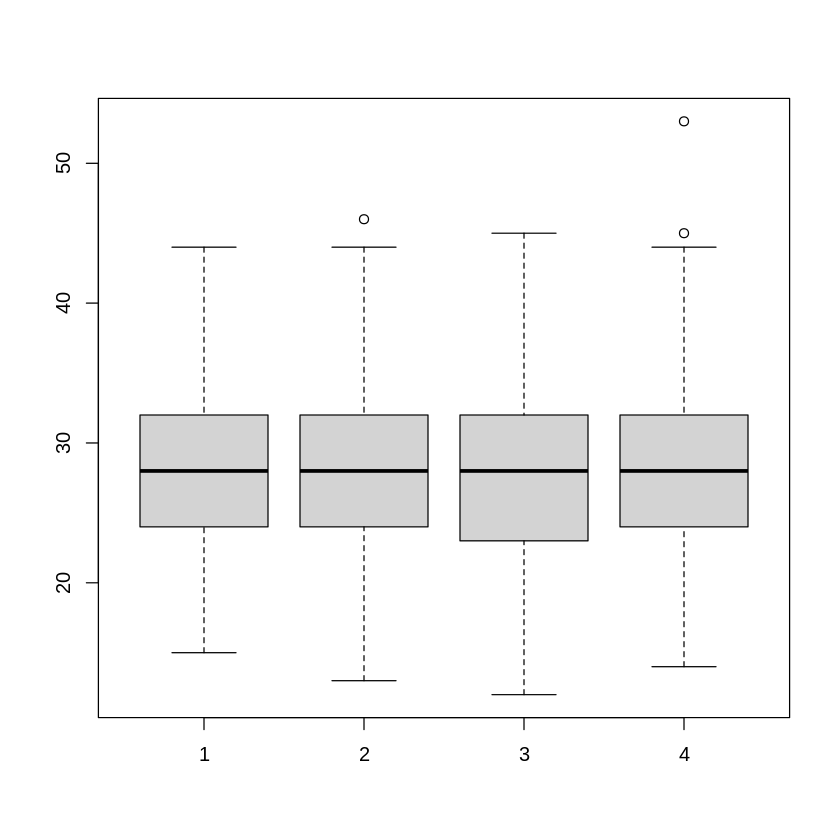

In [ ]:
nouedat <-split(partos$EDATMARE,partos$TRIMESTR)
boxplot(nouedat)

### Pregunta 1

Imagina que te encargan hacer un estudio sobre los niños nacidos en Barcelona en este período. ¿Los datos de esta tabla son una muestra adecuada? ¿Por qué?



### Pregunta 2

¿Por qué crees que algunos datos de peso de los niños tienen un valor de 0?. Cuando has repetido el análisis ¿Has notado algún cambio es los estadísticos de tendencia central? ¿Han cambiado todos por igual? ¿Por qué unos cambian más que otros? ¿Cuál es en tu opinión el estadístico de tendencia central más adecuado en este caso? ¿Por qué?

### Pregunta 3

Selecciona dos parámetros estadísticos que describan las características más importante del conjunto de pesos de niños y anota sus valores. Comenta brevemente tu elección.

### Pregunta 4

Selecciona dos parámetros estadísticos que describan las características más importante del conjunto de edades de las madres y anota sus valores.

### Pregunta 5

¿Cómo puedes representar las diferencias en las edades de las madres que dan a luz en distintos cuatrimestres? ¿En qué te fijarías? ¿observas diferencias?